In [74]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from keras.datasets import mnist
import numpy as np
from tensorflow.math import confusion_matrix
import seaborn as sns

In [75]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [76]:
print(x_train.shape , x_test.shape ,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image Dimension = 28*28


5


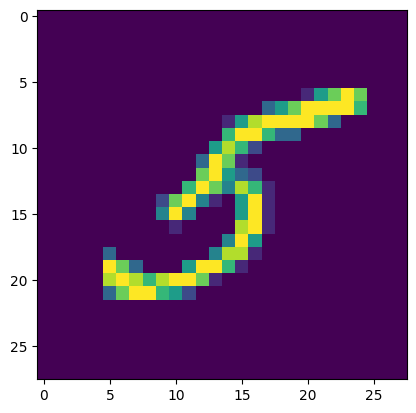

In [77]:
plt.imshow(x_train[35])
print(y_train[35])

In [78]:
print(np.unique(y_train))
print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [79]:
print(x_train[10])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [80]:
print(x_test[25])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   3  80 195  85  80
   80  80  14   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   9 253 253 253 253
  253 253 152   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  11  62  56   0   9 253 253 253 253
  253 253 251 237  57   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 141 253 241  83   4 161 253 253 253
  253 253 253 253  60   0   0   0   0   0]
 [  0   0   0   0   0   0   0  11 141 248 253 253 147   0  73 20

In [81]:
x_train=x_train/225
x_test=x_test/225

In [82]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [83]:
print(x_test[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network


In [84]:
model = keras.Sequential([
                  keras.layers.Flatten(input_shape=(28,28)),
                  keras.layers.Dense(20,activation='relu'),
                  keras.layers.Dense(30,activation='relu'),
                  keras.layers.Dense(10,activation='sigmoid')])

In [85]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
#training the model

model.fit(x_train,y_train,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3681 - accuracy: 0.8911
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2040 - accuracy: 0.9405
Epoch 3/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1694 - accuracy: 0.9497
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1493 - accuracy: 0.9560
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1338 - accuracy: 0.9599
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1223 - accuracy: 0.9628
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1125 - accuracy: 0.9655
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1049 - accuracy: 0.9679
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0993 - accuracy: 0.9688
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.093

**Accuracy on training data**


loss: 0.0489 - accuracy: 0.9842

**Accuracy on test data**


loss: 0.1403 - accuracy: 0.9658

In [87]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1472 - accuracy: 0.9632


6


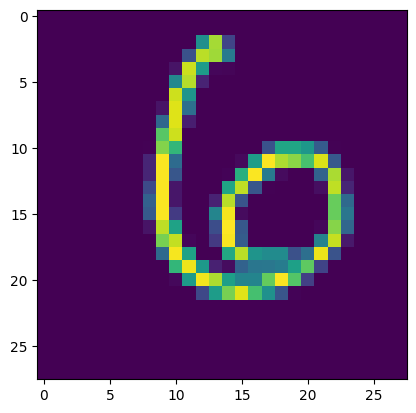

In [88]:
plt.imshow(x_test[100])

print(y_test[100])

**Model Prediction**

In [89]:
y_test_pred=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


[3.0686590e-01 1.9323997e-03 2.2447400e-02 6.6869794e-03 7.8177027e-02
 6.7057140e-02 9.9998641e-01 5.0711233e-06 1.5115837e-04 3.3713900e-04]


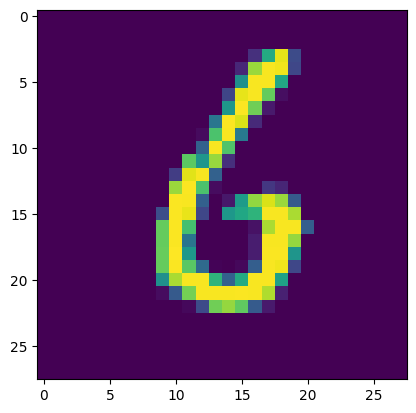

In [90]:
plt.imshow(x_test[50])
print(y_test_pred[50])




In [91]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_test_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 3, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

9


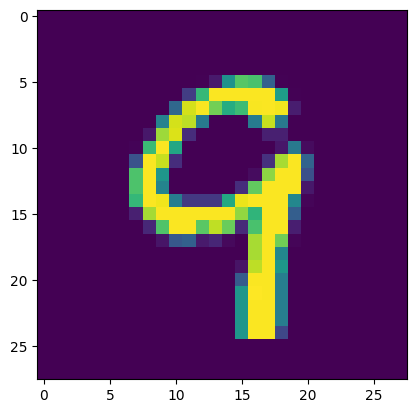

In [92]:
plt.imshow(x_test[150])
print(y_pred_labels[150])


Confusion Matrix

In [93]:
cm=confusion_matrix(y_test,y_pred_labels)

Text(0.5, 47.7222222222222, 'Predicted Labels')

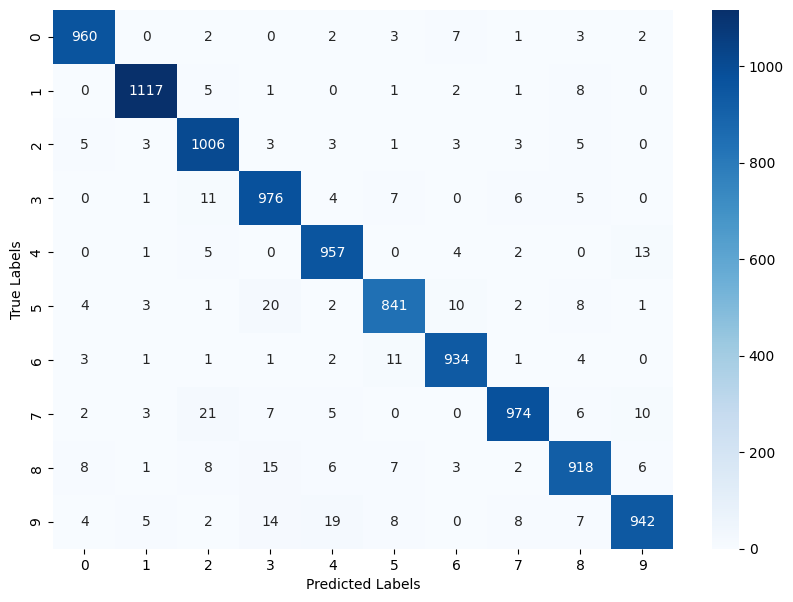

In [94]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a predictive system using user input.**

Path of the image to be predicted: /content/MNIST_digit.png


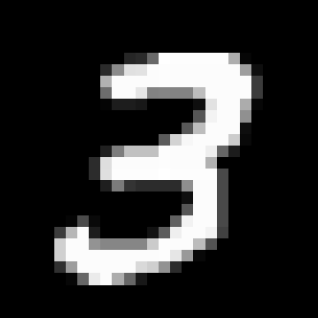

1/1 [==============================] - 0s 28ms/step
The Handwritten Digit is recognised as  3


In [96]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)